# 1. Introduction


> Nama : Muhammad Fahmi Fathony

> Batch : FTDS-022-RMT

> Project : Customer Segmentation data kartu kredit sebuah bank




# Background

> Dalam dunia bisnis saat ini, segmentasi pelanggan memainkan peran penting dalam pemahaman karalteristik kustomer yang beragam. praktik strategis ini memungkinkan bisnis untuk menyesuaikan produk, meningkatkan strategi pemasaran, dan membangun kepuasan pelanggan yang lebih banyak, sehingga perusahaan akan memiliki posisi brand yang lebih baik di mata masyarakat luas.

# Objective

> Melakukan analisa segmentasi nasabah kartu kredit dengan K-Means dan Clustering. melakukan analisis demografi dan perilaku nasabah serta menyesuaikan strategi pemasaran untuk setiap segmentasi layanan keuangan untuk mendorong perilaku yang lebih menguntungkan.

# Problem Statement

1. Berapa banyak cluster yang paling optimal ?
2. Bagaimanakah karakteristik masing-masing cluster ?
3. Apa KELEBIHAN dan KELEMAHAN dari model yang dibuat dan kaitannya dengan bisnis ?
4. Apa improvement selanjutnya dari model yang dibuat ?


#Conceptual Problems

### 1. Algoritma K-Means
Salah satu algoritma dalam analisis clustering yang digunakan untuk mengelompokkan data ke dalam kategori yang berbeda secara otomatis. Tujuan algoritma ini adalah untuk mempartisi himpunan data ke dalam kelompok-kelompok (klaster) yang berbeda berdasarkan kemiripan antar data.

Algoritma K-Means mencoba untuk mengoptimalkan fungsi tujuan yang disebut sebagai `fungsi inersia (inertia function)` atau sum squared error (SSE). Fungsi tersebut mengukur sejauh mana data dalam klaster berada dekat dengan pusat klasternya, sehingga klaster-klaster yang dihasilkan kompak dan terpisah dengan jelas.

### 2. Elbow method
**Definisi :** adalah teknik yang digunakan untuk menentukan jumlah centroid(k) yang akan digunakan dalam algoritma clustering k-means. Metode ini menentukan nilai k, terus melakukan iterasi untuk k=1 hingga k=n (Di sini n adalah hyperparameter yang dipilih sesuai kebutuhan). Untuk setiap nilai k, menghitung nilai jumlah kuadrat dalam cluster (WCSS).

**Alasan penggunaan :** Metode ini diperlukan untuk menentukan jumlah cluster terbaik yang akan membentuk siku pada suatu titik.

**Cara penggunaan :** Untuk menentukan jumlah cluster yang optimal, kita harus memilih nilai k pada “siku” yaitu titik setelah distorsi/inersia mulai berkurang secara linier.

**Kelemahan :**
- Elbow method tidak akan berfungsi dengan baik terhadap data yang kurang berkerumun.
- Elbow method dinyatakan tidak berhasil jika tidak mendapatkan titik sudut yang membentuk siku.

**Kelebihan :**
- Perhitungan yang digunkakan tidak terlalu banyak.
- Penentuan jumlah cluster terbaik dengan melihat titik yang menjadi
pusat siku.

# 2. Query SQL

```sql
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_022_rmt.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0;
```



# 3. Import Libraries


In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
sns.set(color_codes=True)

# Import library untuk Clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Save Mode
import joblib
import json

import warnings
warnings.filterwarnings('ignore')

# 4. Data Loading

In [111]:
! gdown 1W-a5T1IuWDzF1SCgWY2Q7c7gv-DTS7ut

Downloading...
From: https://drive.google.com/uc?id=1W-a5T1IuWDzF1SCgWY2Q7c7gv-DTS7ut
To: /content/Customer Segmentation CreditCard.csv
100% 496k/496k [00:00<00:00, 129MB/s]


In [112]:
data = pd.read_csv('/content/Customer Segmentation CreditCard.csv')

In [113]:
# Menampilkan jumlah baris dan kolom pada data
data.shape

(4475, 18)

In [114]:
# Menampilkan data 10 baris teratas
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


In [115]:
# Menampilkan data 10 baris terbawah
data.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


# 5. Exploratory Data Analysis (EDA)

In [116]:
# Cek tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [117]:
# Cek jumlah data uniqe setiap kolom (Cek Cardinality)
data.nunique()

CUST_ID                             4475
BALANCE                             4439
BALANCE_FREQUENCY                     42
PURCHASES                           3218
ONEOFF_PURCHASES                    2073
INSTALLMENTS_PURCHASES              2357
CASH_ADVANCE                        2155
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            44
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                46
CASH_ADVANCE_TRX                      55
PURCHASES_TRX                        147
CREDIT_LIMIT                         153
PAYMENTS                            4350
MINIMUM_PAYMENTS                    4317
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

**Penjelasan:**
- `CUST_ID`: Identifikasi customer kartu kredit.
-  `BALANCE`: jumlah saldo yang tersisa pada akun masing-masing customer untuk
melakukan pembelian.
- `BALANCE_FREQUENCY`: Seberapa sering saldo pada akun customer diperbarui, dengan
skor antara 0 dan 1 (1: sering diperbarui, 0: tidak sering diperbarui).
- `PURCHASES`: jumlah pembelian yang dilakukan dari akun milik customer.
- `ONEOFF_PURCHASES`: jumlah pembelian maksimum yang dilakukan dalam sekali jalan.
- `INSTALLMENTS_PURCHASES`: jumlah pembelian yang dilakukan dengan mencicil.
- `CASH_ADVANCE`: Uang muka yang diberikan oleh customer dalam bentuk tunai.
- `PURCHASES_FREQUENCY`: seberapa sering pembelian dilakukan, dengan skor antara 0
dan 1 (1: sering, 0: tidak sering).
- `ONEOFF_PURCHASES_FREQUENCY`: seberapa sering pembelian dilakukan dalamsekali
jalan, dengan skor antara 0 dan 1 (1: sering, 0: tidak sering).
- `PURCHASES_INSTALLMENTS_FREQUENCY`: seberapa sering pembelian dalam
angsuran dilakukan, dengan skor antara 0 dan 1 (1: sering, 0: tidak sering).
- `CASH_ADVANCE_FREQUENCY`: seberapa sering uang muka dibayarkan.
- `CASH_ADVANCE_TRX`: jumlah transaksi yang dilakukan dengan uang tunai.
- `PURCHASES_TRX`: banyaknya transaksi pembelian yang dilakukan.
- `CREDIT_LIMIT`: batas penggunaan kartu kredit.
- `PAYMENTS`: jumlah pembayaran yang dilakukan oleh customer.
- `MINIMUM_PAYMENTS`: jumlah pembayaran minimum yang dilakukan oleh pengguna.
- `PRC_FULL_PAYMENT`: pembayaran penuh yang dibayarkan oleh customer dalam bentuk
persen.
- `TENURE`: masa berlaku layanan kartu kredit.

In [118]:
# Cek unique value beberapa kolom
print("BALANCE_FREQUENCY:", data['BALANCE_FREQUENCY'].unique())
print("TENURE:", data['TENURE'].unique())
print("CREDIT_LIMIT:", data['CREDIT_LIMIT'].unique())
print("MINIMUM_PAYMENTS:", data['MINIMUM_PAYMENTS'].unique())

BALANCE_FREQUENCY: [0.125    0.875    1.       0.375    0.545455 0.454545 0.363636 0.181818
 0.909091 0.       0.272727 0.090909 0.727273 0.818182 0.25     0.636364
 0.75     0.625    0.6      0.5      0.833333 0.444444 0.666667 0.8
 0.571429 0.857143 0.777778 0.7      0.333333 0.888889 0.166667 0.714286
 0.2      0.3      0.1      0.9      0.4      0.111111 0.222222 0.285714
 0.142857 0.555556]
TENURE: [ 8 12 10  6  7 11  9]
CREDIT_LIMIT: [ 1200.        1000.        1500.        2500.        2900.
  3000.        6000.        2200.        5000.        1600.
  2000.        4000.        1800.        3500.       13500.
  7500.        1900.         600.        1700.        8000.
  8500.        9000.        1300.        5700.        2700.
  6150.        7000.        4500.       10500.        6500.
  3050.       10000.        2400.         700.       11500.
   450.        4200.       16500.        9500.       12500.
  3150.       21500.        4250.       23000.        2300.
 13000.        2

In [119]:
# Cek statistik sederhana
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,4475.0,4476.000000,2583.931114,2.000000,2239.000000,4476.000000,6713.000000,8950.000000
BALANCE,4475.0,1565.743939,2091.205727,0.000000,132.536353,874.905296,2058.519163,19043.138560
BALANCE_FREQUENCY,4475.0,0.877608,0.235604,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,4475.0,1003.158324,2210.812899,0.000000,40.065000,362.480000,1122.640000,49039.570000
ONEOFF_PURCHASES,4475.0,588.504849,1666.500287,0.000000,0.000000,29.990000,580.320000,40761.250000
INSTALLMENTS_PURCHASES,4475.0,415.025075,927.360842,0.000000,0.000000,89.450000,484.255000,22500.000000
CASH_ADVANCE,4475.0,973.453671,2133.464502,0.000000,0.000000,0.000000,1098.569962,29282.109150
PURCHASES_FREQUENCY,4475.0,0.490122,0.399874,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,4475.0,0.202614,0.298502,0.000000,0.000000,0.083333,0.333333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,4475.0,0.364989,0.397336,0.000000,0.000000,0.166667,0.750000,1.000000


In [120]:
# Cek Missing Value
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [121]:
# Menghapus missing value karena presentasenya sedikit terhadap data keseluruhan
data.dropna(inplace=True)
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
3,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
4,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
5,4266,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8
7,4680,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


In [122]:
# Cek Missing Value kembali
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [123]:
data.shape

(4316, 18)

In [124]:
# Cek Jumlah Data Duplikat
data.duplicated().sum()

0

**Penjelasan:**
- Tidak terdapat baris duplikat


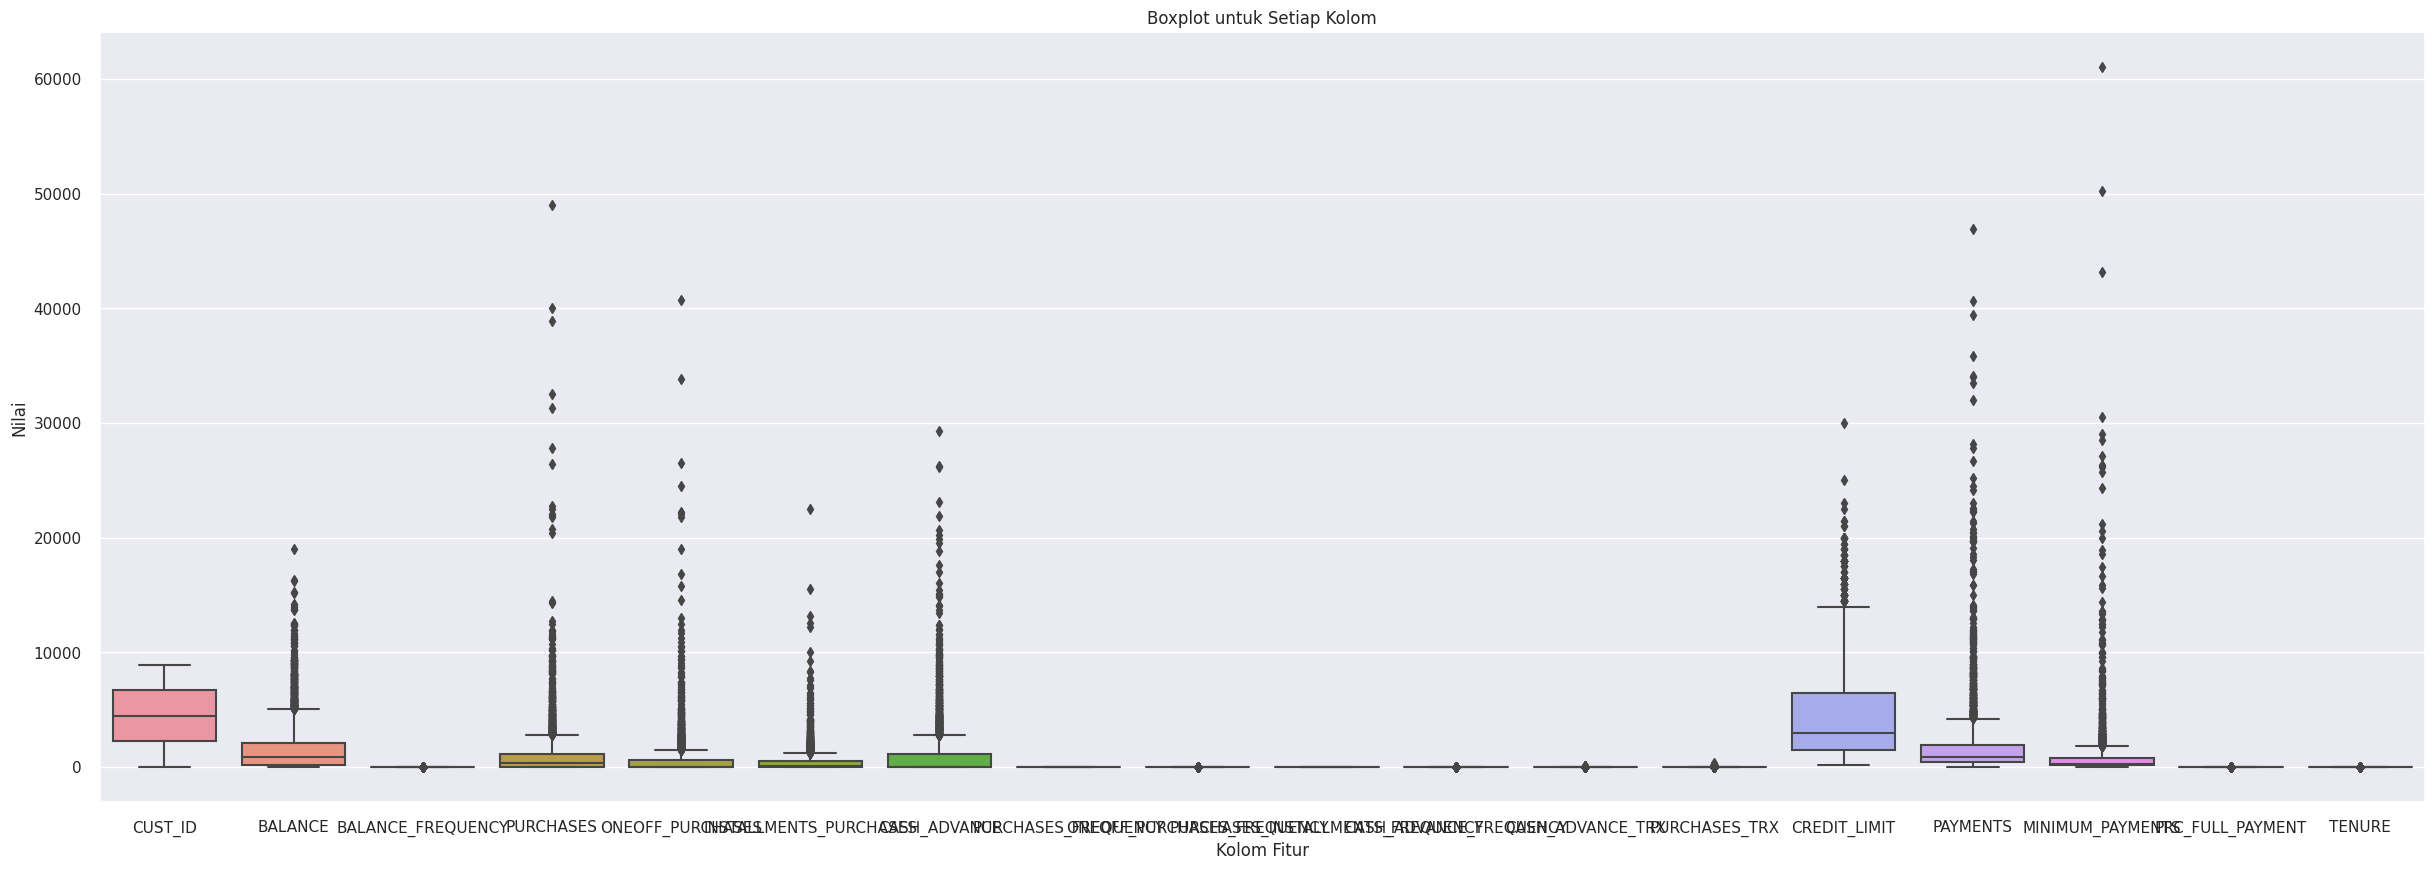

In [125]:
# Boxplot untuk mengetahui Outlier pada data
plt.figure(figsize=(30, 10))
sns.boxplot(data=data)
plt.title('Boxplot untuk Setiap Kolom')
plt.xlabel('Kolom Fitur')
plt.ylabel('Nilai')
plt.show()

In [126]:
data.nunique()

CUST_ID                             4316
BALANCE                             4313
BALANCE_FREQUENCY                     38
PURCHASES                           3118
ONEOFF_PURCHASES                    2022
INSTALLMENTS_PURCHASES              2292
CASH_ADVANCE                        2091
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            44
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                46
CASH_ADVANCE_TRX                      55
PURCHASES_TRX                        147
CREDIT_LIMIT                         151
PAYMENTS                            4316
MINIMUM_PAYMENTS                    4316
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [127]:
# Handling Outlier dengan metode IQR
Q1 = data.BALANCE.quantile(0.05)
Q3 = data.BALANCE.quantile(0.95)
IQR = Q3 - Q1
data = data[(data.BALANCE >= Q1 - 1.5*IQR) & (data.BALANCE <= Q3 + 1.5*IQR)]

Q1 = data.PURCHASES.quantile(0.05)
Q3 = data.PURCHASES.quantile(0.95)
IQR = Q3 - Q1
data = data[(data.PURCHASES >= Q1 - 1.5*IQR) & (data.PURCHASES <= Q3 + 1.5*IQR)]

Q1 = data.ONEOFF_PURCHASES.quantile(0.05)
Q3 = data.ONEOFF_PURCHASES.quantile(0.95)
IQR = Q3 - Q1
data = data[(data.ONEOFF_PURCHASES >= Q1 - 1.5*IQR) & (data.ONEOFF_PURCHASES <= Q3 + 1.5*IQR)]

Q1 = data.INSTALLMENTS_PURCHASES.quantile(0.05)
Q3 = data.INSTALLMENTS_PURCHASES.quantile(0.95)
IQR = Q3 - Q1
data = data[(data.INSTALLMENTS_PURCHASES >= Q1 - 1.5*IQR) & (data.INSTALLMENTS_PURCHASES <= Q3 + 1.5*IQR)]

Q1 = data.CASH_ADVANCE.quantile(0.05)
Q3 = data.CASH_ADVANCE.quantile(0.95)
IQR = Q3 - Q1
data = data[(data.CASH_ADVANCE >= Q1 - 1.5*IQR) & (data.CASH_ADVANCE <= Q3 + 1.5*IQR)]

Q1 = data.CREDIT_LIMIT.quantile(0.05)
Q3 = data.CREDIT_LIMIT.quantile(0.95)
IQR = Q3 - Q1
data = data[(data.CREDIT_LIMIT >= Q1 - 1.5*IQR) & (data.CREDIT_LIMIT <= Q3 + 1.5*IQR)]

Q1 = data.PAYMENTS.quantile(0.05)
Q3 = data.PAYMENTS.quantile(0.95)
IQR = Q3 - Q1
data = data[(data.PAYMENTS >= Q1 - 1.5*IQR) & (data.PAYMENTS <= Q3 + 1.5*IQR)]

Q1 = data.MINIMUM_PAYMENTS.quantile(0.05)
Q3 = data.MINIMUM_PAYMENTS.quantile(0.95)
IQR = Q3 - Q1
data = data[(data.MINIMUM_PAYMENTS >= Q1 - 1.5*IQR) & (data.MINIMUM_PAYMENTS <= Q3 + 1.5*IQR)]


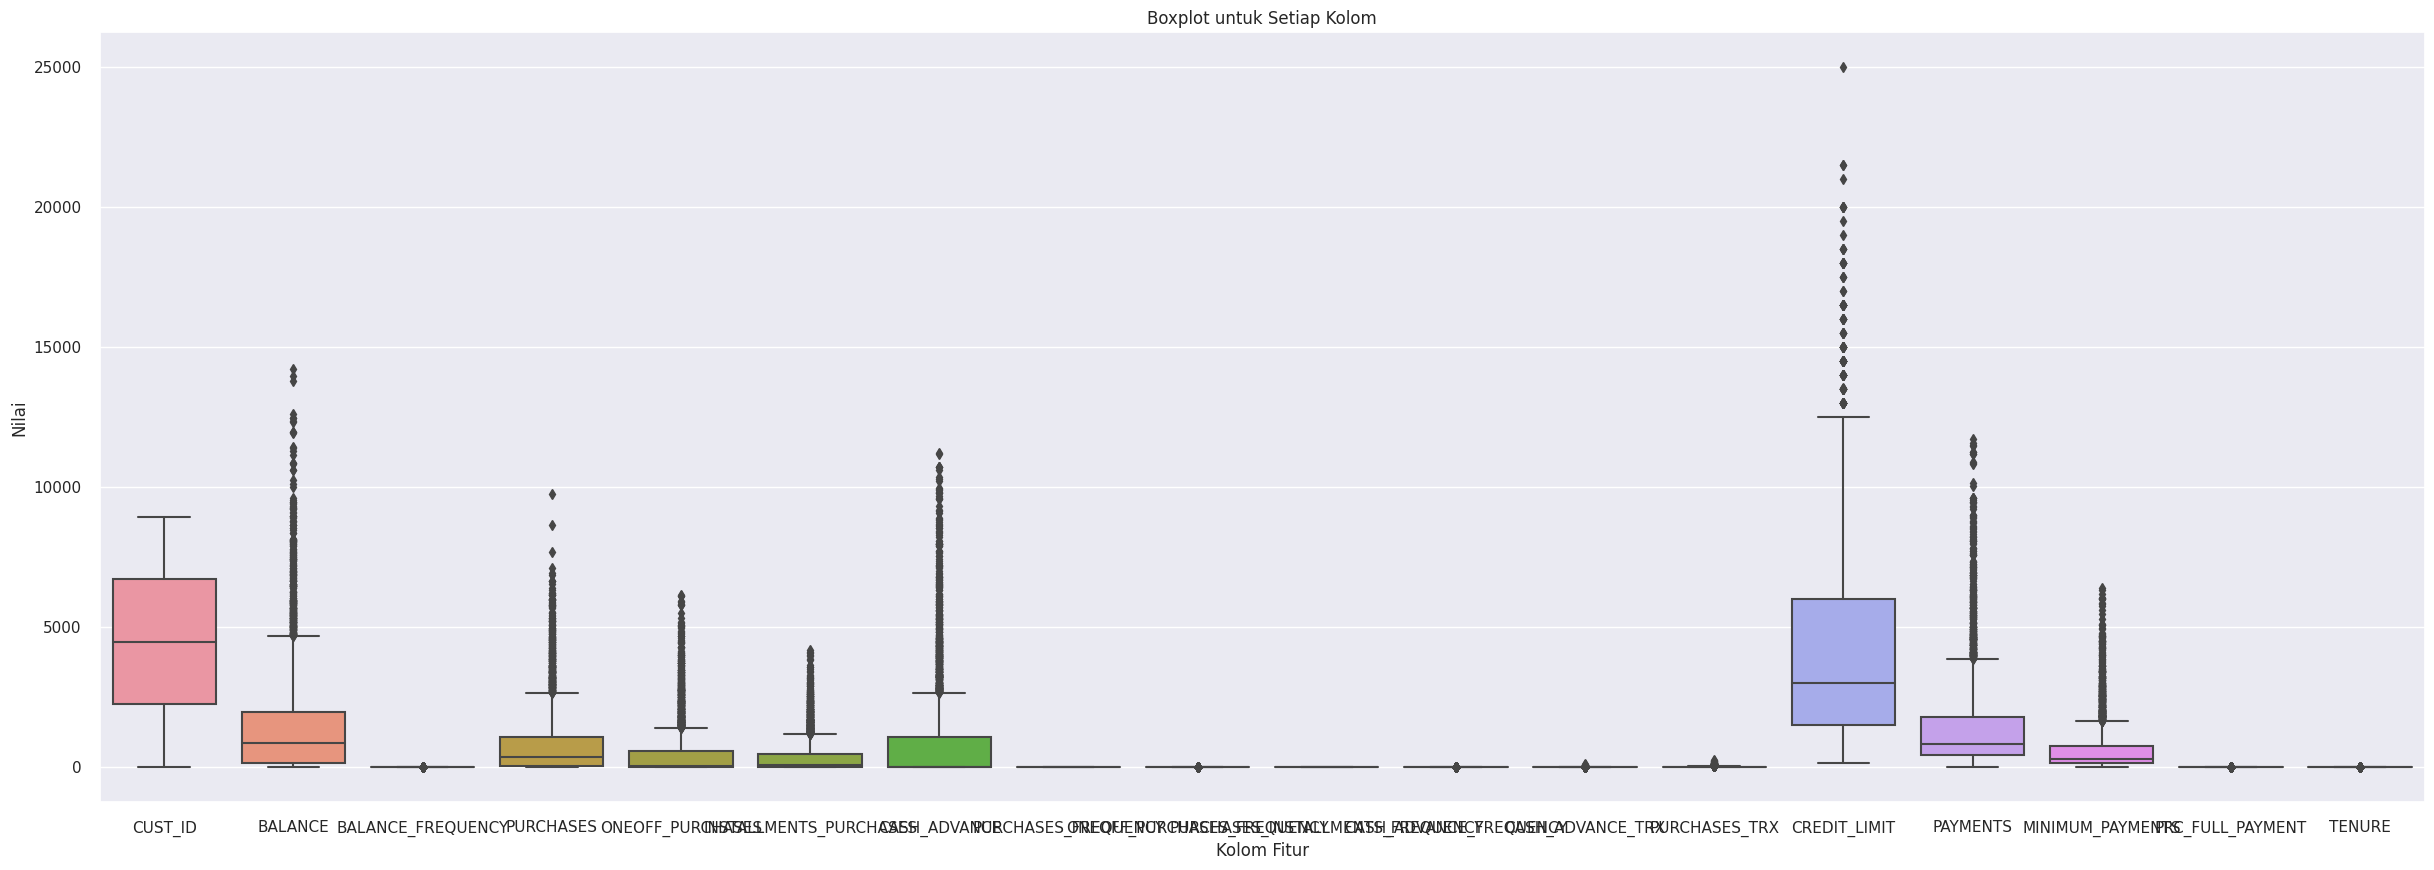

In [128]:
# Boxplot untuk mengetahui pesebaran data setelah handla outlier
plt.figure(figsize=(30, 10))
sns.boxplot(data=data)
plt.title('Boxplot untuk Setiap Kolom')
plt.xlabel('Kolom Fitur')
plt.ylabel('Nilai')
plt.show()

<Axes: >

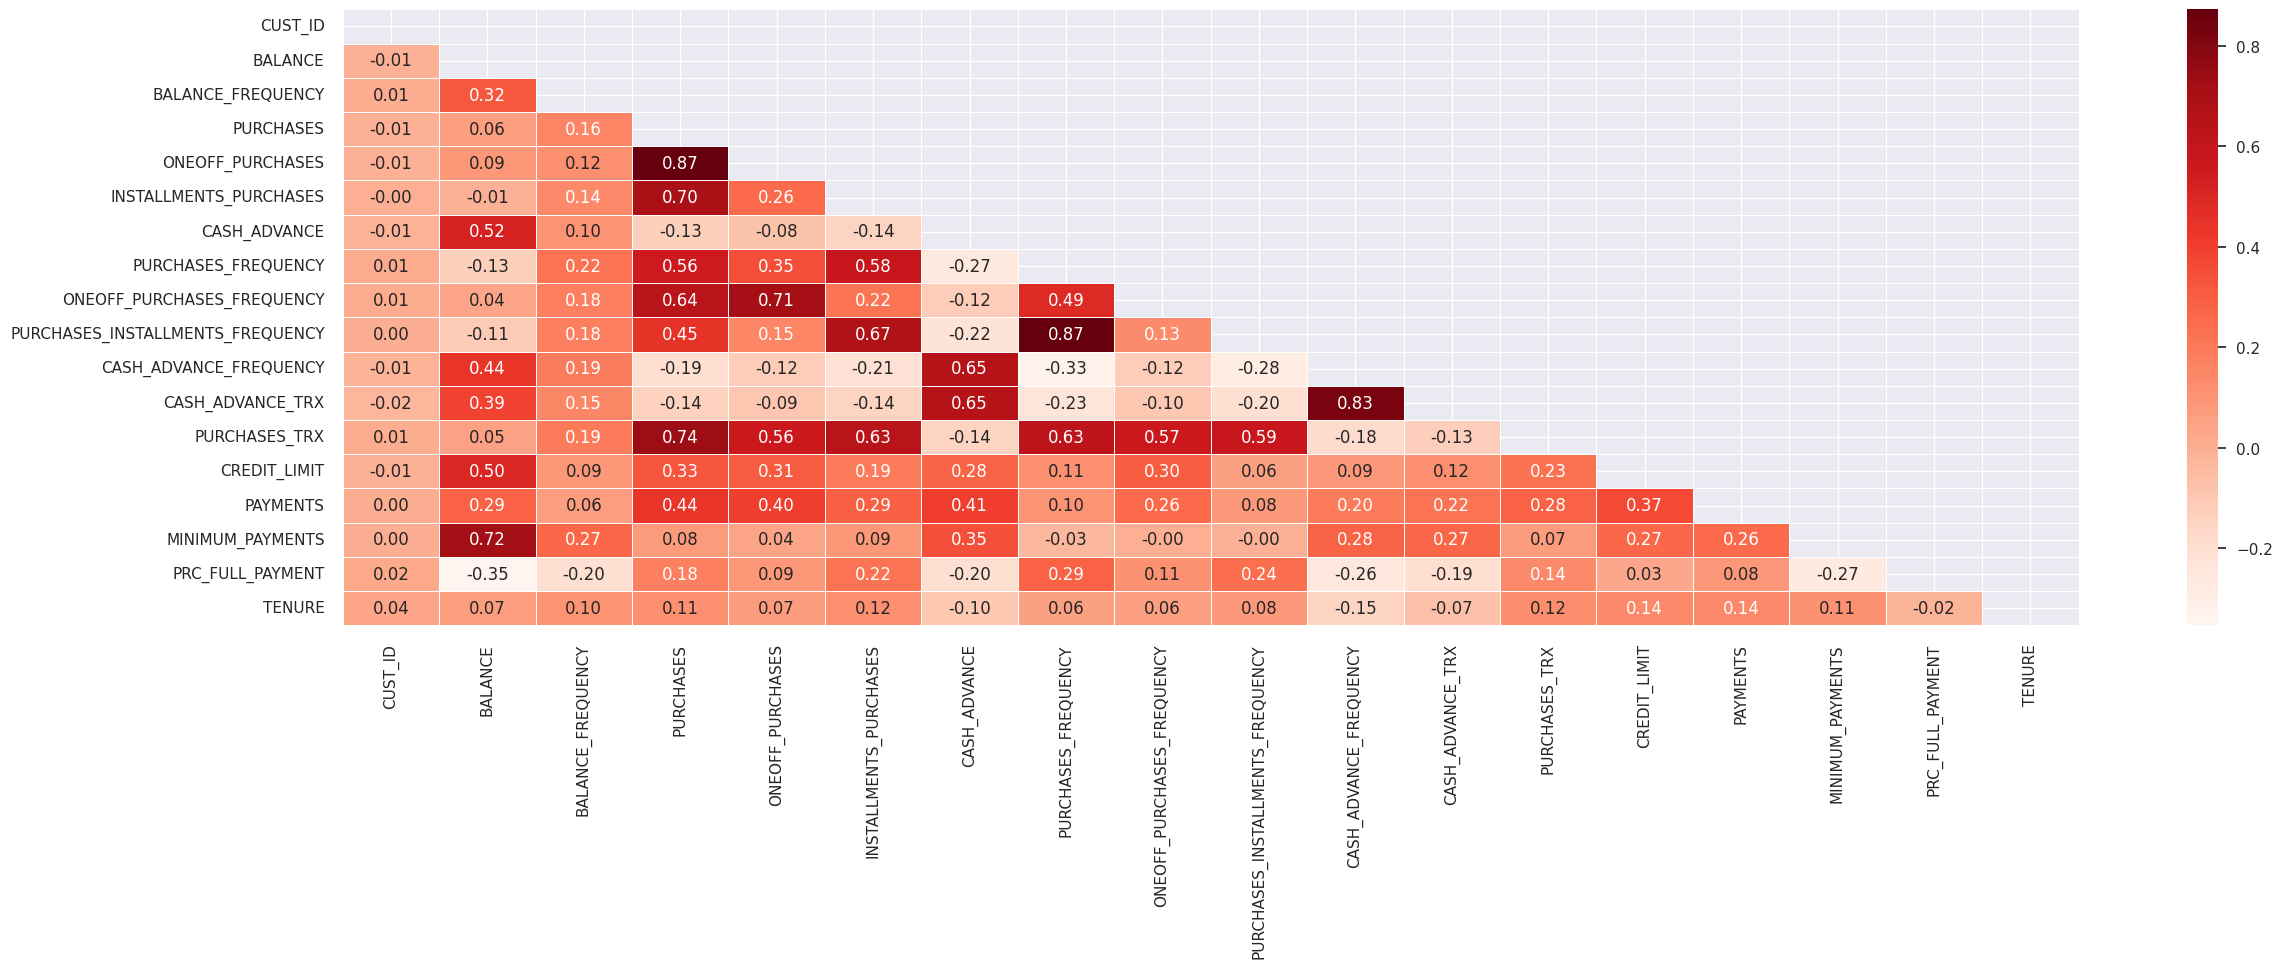

In [129]:
# Mencari Korelasi beberapa fitur dengan target
fig, ax = plt.subplots(figsize=(28,8))

mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
sns.heatmap(data.corr(), annot=True, cmap="Reds", mask=mask, linewidth=0.5, fmt=".2f")

# 6. Feature Engineering

### 6.1 Feature Selection

In [130]:
# drop kolom CUST_ID

data_select =data.drop('CUST_ID', axis=1)
data_select

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
3,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
4,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
5,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8
7,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


**Penjelasan:**
- Kolom `CUST_ID` dilakukan drop karena merupakan identitas

### 6.2 PCA (Dimensionality Reduction)

In [131]:
# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_select)

**Penjelasan :**
- Scaling data menggunakan standardscaler karena data berdistribusi normal (distribusi data nya berpengaruh ke y)

In [132]:
model_pca = PCA()
model_pca.fit(data_scaled)


PCA()

In [133]:
# Menentukan dimensi data yang optimal berdasarkan model dimensionality reduction
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(model_pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

12

**Penjelasan:**
- didapatkan 12 features hasil dimensional reduction ketika ingin mengetahui sekitar 95% informasi dari data yang ada

In [134]:
# Let's train the model with 95 % of the original dataset information

pca = PCA(n_components=num_features)
pca.fit(data_scaled)

data_scaled_pca = pca.transform(data_scaled)

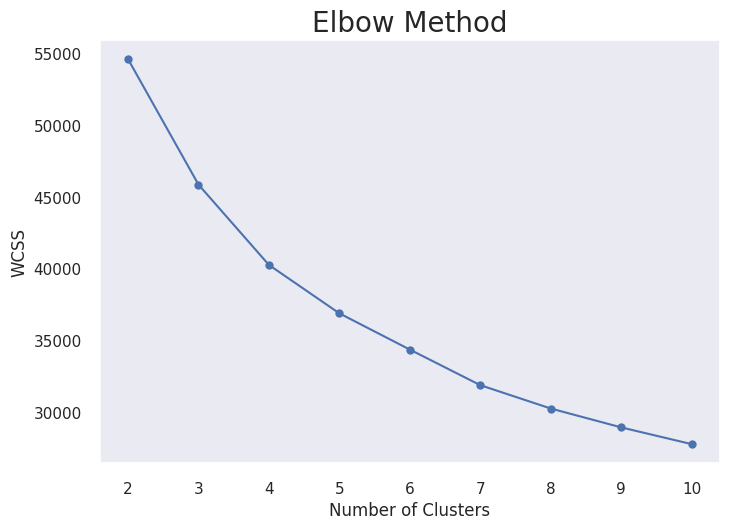

In [135]:
wcss = []
random_state = 10
max_cluster = 10
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(data_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

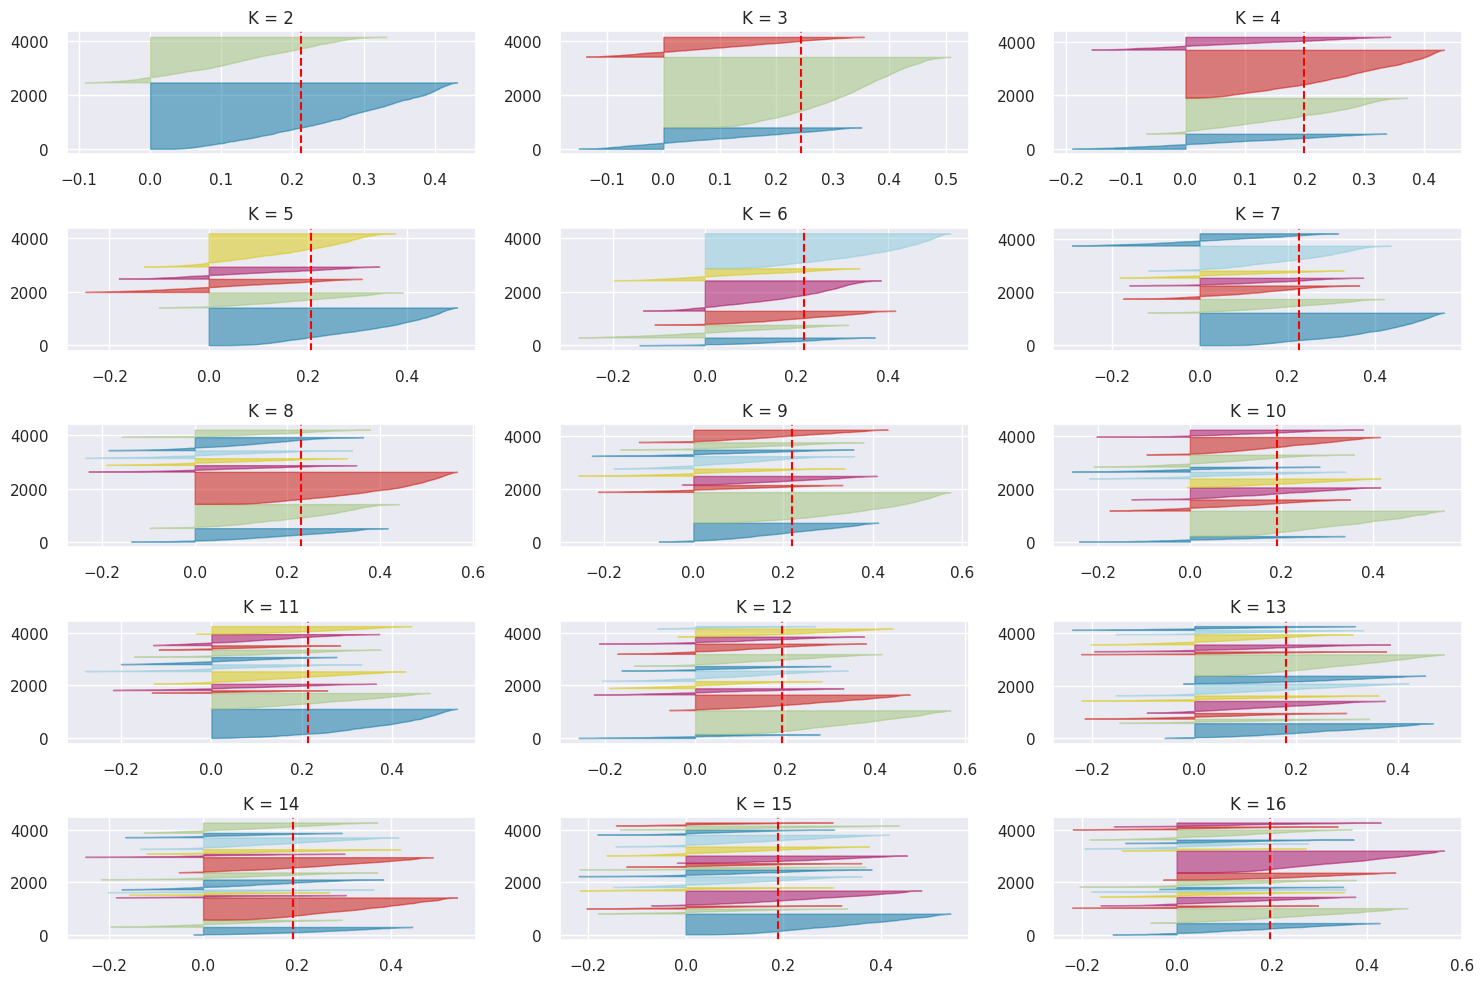

In [136]:
# Display the Silhouette Score and Plot Silhouette Plot

fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop for each plot
for i, ax in enumerate(axes.flatten()):

    # Initialize K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 12)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to data
    visualizer.fit(data_scaled_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

**Penjelasan:**
- dari Hasil Evaluasi `Elbow Method` ada line membentuk siku pada nilai 3, sehingga bisa dikatakan bahwa K yang terbaik adalah K = 3
- dari hasil `Silhoute Score` K=3 merupakan cluster yang paling optimal dikarenakan paling kecil nilai minus nya dibanding lainnya dan setiap clusternya memiliki nilai yang lebih dari mean keseluruhan

# 7. Model Definition

In [137]:
model_km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

**Insight:**
- Salah satu kelebihan dari K-Means adalah kesederhanaannya yang membuatnya mudah digunakan dan efisien dalam menemukan Cluster dengan bentuk elips atau bola. Namun, K-Means juga memiliki kelemahan yaitu tidak efektif dalam menangani Cluster dengan ukuran atau bentuk yang tidak terdefinisi dengan jelas.

# 8. Model Training

In [138]:
# Train with optimal number of clusters

cluster_labels = model_km.fit_predict(data_scaled_pca)
cluster_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [139]:
# Insert clustering result into original dataset

data['cluster'] = cluster_labels
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8,0
3,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8,0
4,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8,0
5,4266,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8,0
7,4680,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11,1
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11,1
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11,1
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11,1


# 9. Model Evaluation

<Axes: >

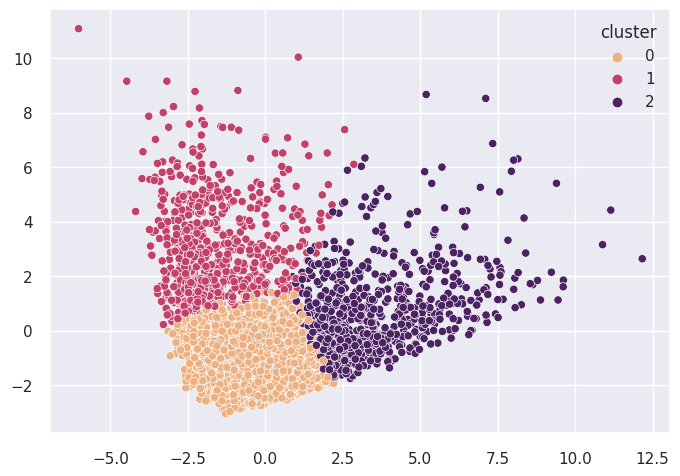

In [140]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(data_scaled_pca)

data_scaled_pca_2d = pca_2d.fit_transform(data_scaled_pca)

sns.scatterplot(x=data_scaled_pca_2d[:,0], y=data_scaled_pca_2d[:,1], hue=data['cluster'], palette='flare')

**Insight:**
- Hasil visualisasi didapatkan 3 clustering yang paling optimal dengan paling sedikit overlap.

# EDA After Modelling

<Axes: >

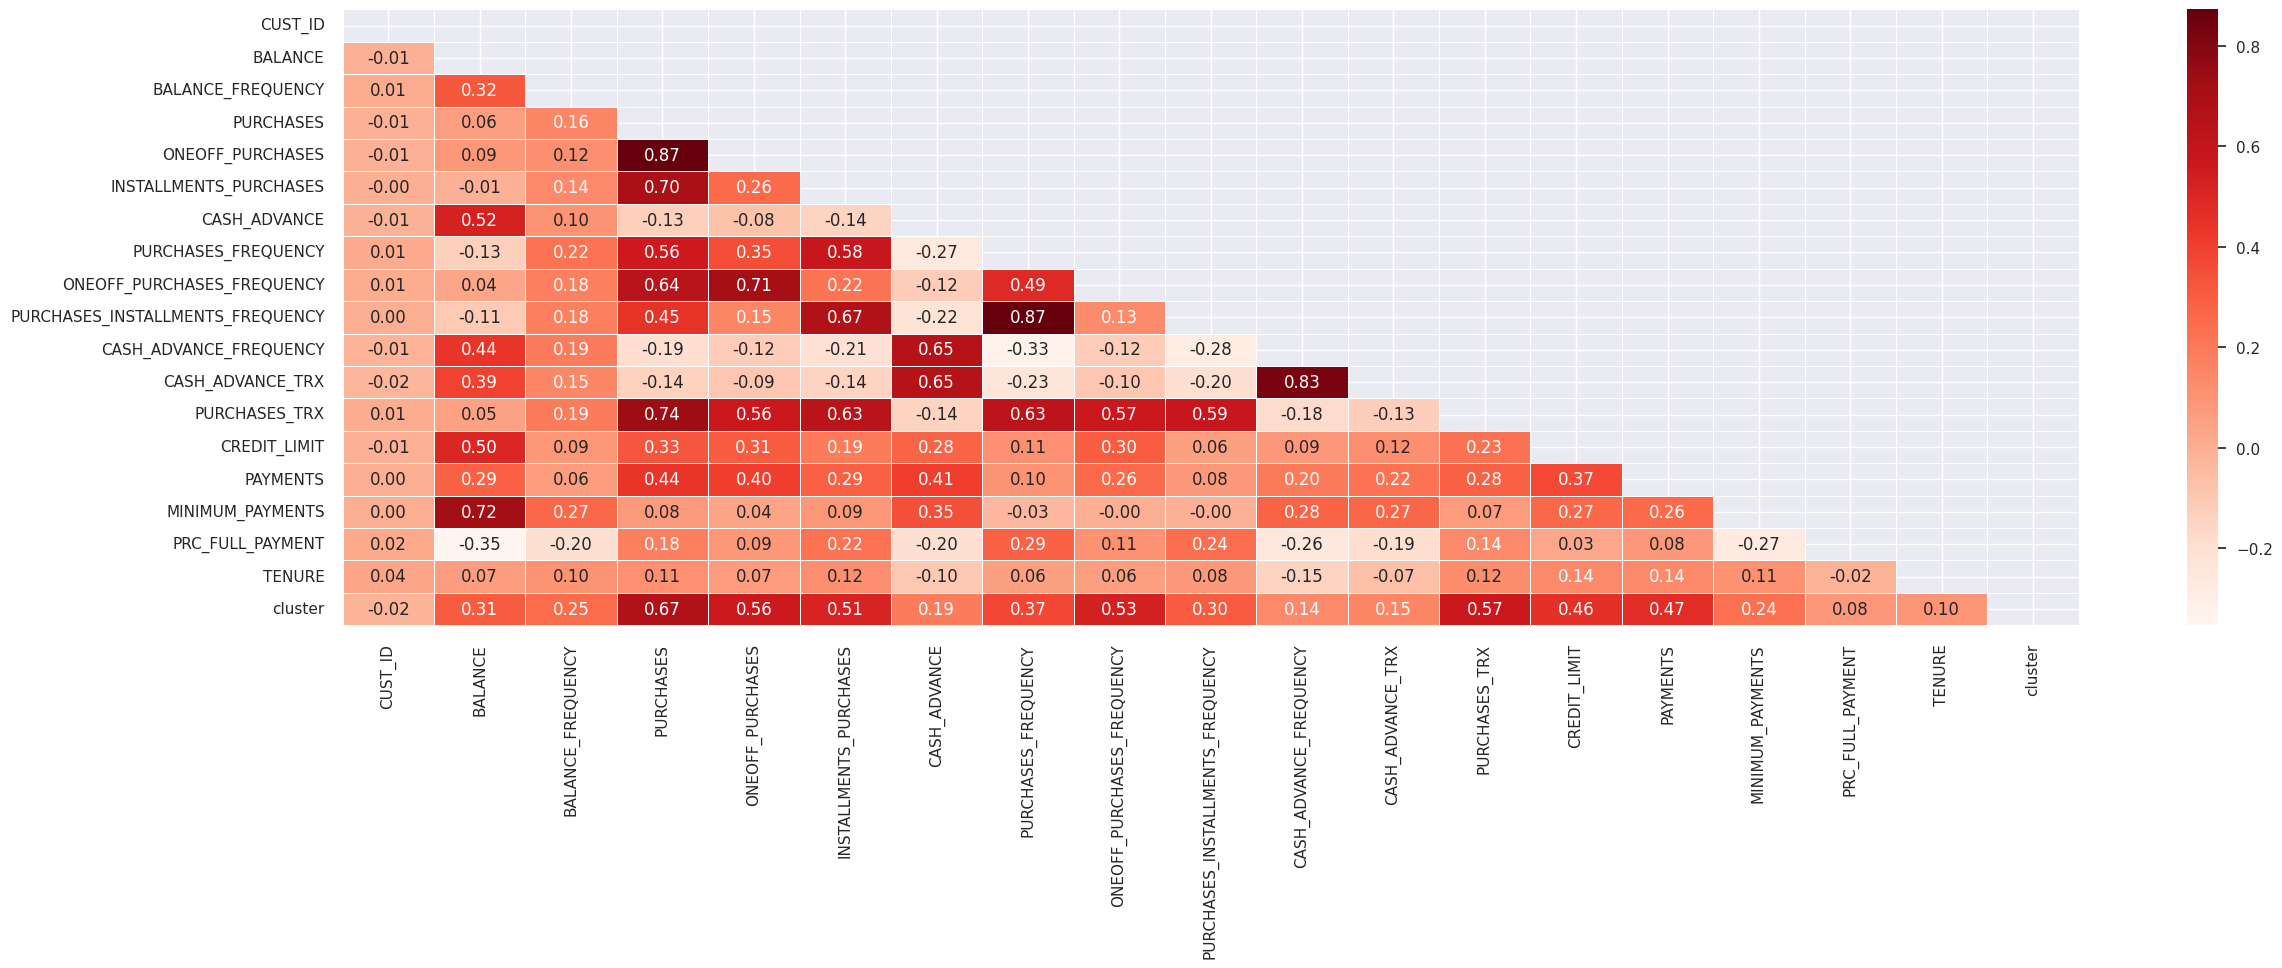

In [141]:
# Mencari Korelasi beberapa fitur dengan target
fig, ax = plt.subplots(figsize=(28,8))

mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
sns.heatmap(data.corr(), annot=True, cmap="Reds", mask=mask, linewidth=0.5, fmt=".2f")

**Insight:**
- Hasil corelasi menunjukkan bahwa fitur yang paling berpengaruh terhadap cluster adalah sebagai berikut berdasarkan rangkingnya:
1. `PURCHASES`
2. `PURCHASES_TRX`
3. `ONEOFF_PURCHASES`
4. `ONEOFF_PURCHASES_FREQUENCY`
5. `INSTALLMENTS_PURCHASES`
6. `PAYMENTS`
7. `CREDIT_LIMIT`

In [142]:
# Mengetahui perbandingan jumlah datayang sudah dikelompokkan kedalam masing-masing cluster
perbandingan_cluster = data['cluster'].value_counts()
perbandingan_cluster

0    2607
2     793
1     733
Name: cluster, dtype: int64

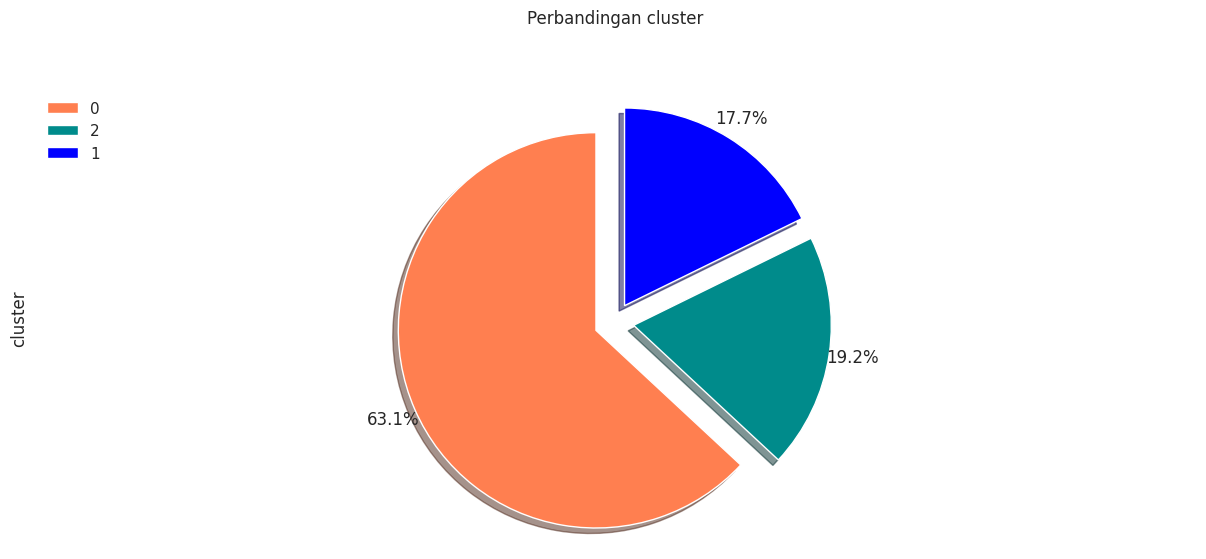

In [143]:
# Menampilkan Pie chart perbandingan setiap cluster.
colors_list = ['coral','darkcyan', 'blue']
explode_list = [0.1, 0.1, 0.1]

perbandingan_cluster.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct
                            colors=colors_list,  # add custom colors
                            explode=explode_list
                            )

# scale the title up by 12% to match pctdistance
plt.title('Perbandingan cluster', y=1.12)

plt.axis('equal')

# add legend
plt.legend(labels=perbandingan_cluster.index, loc='upper left')

plt.show()
# Default payment (1=yes, 0=no)

**Insight:**
- Cluster 0 memiliki jumlah paling banyak yaitu 63,1%, selanjutnya cluster 2 sebesar 19,2% dan yang terakhir cluster sebesar 17,7%.

In [144]:
# melihat karakteristik cluster berdasarkan nilai rata-rata purchases
cluster_purchases = data.groupby('cluster')['PURCHASES'].mean()
cluster_oneoffpurchases = data.groupby('cluster')['ONEOFF_PURCHASES'].mean()
cluster_installmentpurchases = data.groupby('cluster')['INSTALLMENTS_PURCHASES'].mean()
cluster_PURCHASES_TRX = data.groupby('cluster')['PURCHASES_TRX'].mean()

print('Perbandingan antara cluster dan purchases')
print(cluster_purchases)

print('Perbandingan antara cluster dan one off purchases')
print(cluster_oneoffpurchases)

print('Perbandingan antara cluster dan installment purchases')
print(cluster_installmentpurchases)

print('Perbandingan antara cluster dan purchases tansaksi')
print(cluster_PURCHASES_TRX)

Perbandingan antara cluster dan purchases
cluster
0     395.500127
1     334.198445
2    2630.969369
Name: PURCHASES, dtype: float64
Perbandingan antara cluster dan one off purchases
cluster
0     196.416045
1     199.474638
2    1557.683695
Name: ONEOFF_PURCHASES, dtype: float64
Perbandingan antara cluster dan installment purchases
cluster
0     199.677468
1     134.815143
2    1073.347465
Name: INSTALLMENTS_PURCHASES, dtype: float64
Perbandingan antara cluster dan purchases tansaksi
cluster
0     7.388953
1     4.979536
2    40.143758
Name: PURCHASES_TRX, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

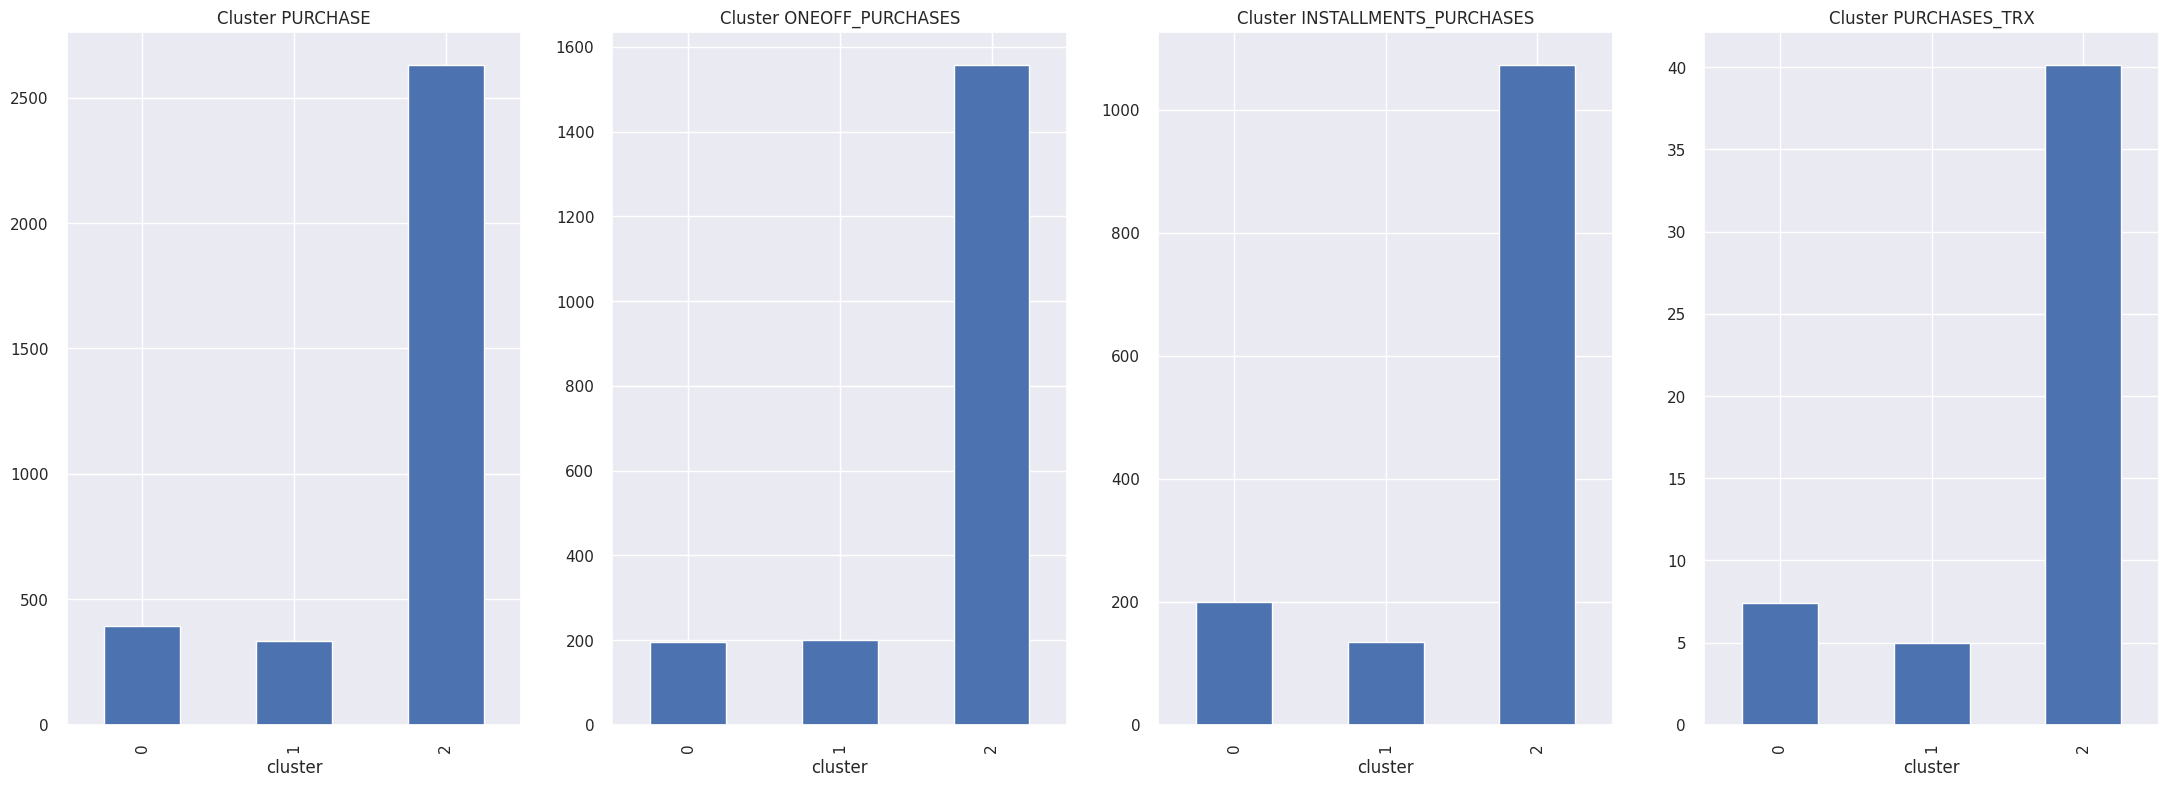

In [145]:
# Menampilkan bar chart untuk melihat karakteristik cluster berdasarkan nilai rata-rata purchases
plt.figure(figsize=(27,9))
plt.subplot(1,4,1)
cluster_purchases.plot(kind='bar')
plt.title('Cluster PURCHASE')

plt.subplot(1,4,2)
cluster_oneoffpurchases.plot(kind='bar')
plt.title('Cluster ONEOFF_PURCHASES')

plt.subplot(1,4,3)
cluster_installmentpurchases.plot(kind='bar')
plt.title('Cluster INSTALLMENTS_PURCHASES')

plt.subplot(1,4,4)
cluster_PURCHASES_TRX.plot(kind='bar')
plt.title('Cluster PURCHASES_TRX')
plt.show


**Insight:**
- Cluster 0 dan 1 memiliki nilai rata-rata purchases (Nilai dalam bentuk banyaknya transaksi), oneoff purchases, installment purchases dan purchases transaksi yang tidak selisih jauh (nilai bisa dilihat diatas), sedangkan pada cluster 2 sangat jauh beda dari kedua cluster 0 dan 1.

In [146]:
# Melihat karakteristik cluster berdasarkan nilai credit limit dan payments
cluster_CREDIT_LIMIT = data.groupby('cluster')['CREDIT_LIMIT'].mean()
cluster_PAYMENTS = data.groupby('cluster')['PAYMENTS'].mean()

print('Perbandingan antara cluster dan credit limit')
print(cluster_CREDIT_LIMIT)

print('Perbandingan antara cluster dan payments')
print(cluster_PAYMENTS)

Perbandingan antara cluster dan credit limit
cluster
0    3043.120232
1    6353.478854
2    6644.302419
Name: CREDIT_LIMIT, dtype: float64
Perbandingan antara cluster dan payments
cluster
0     808.407964
1    2422.835579
2    2554.348689
Name: PAYMENTS, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

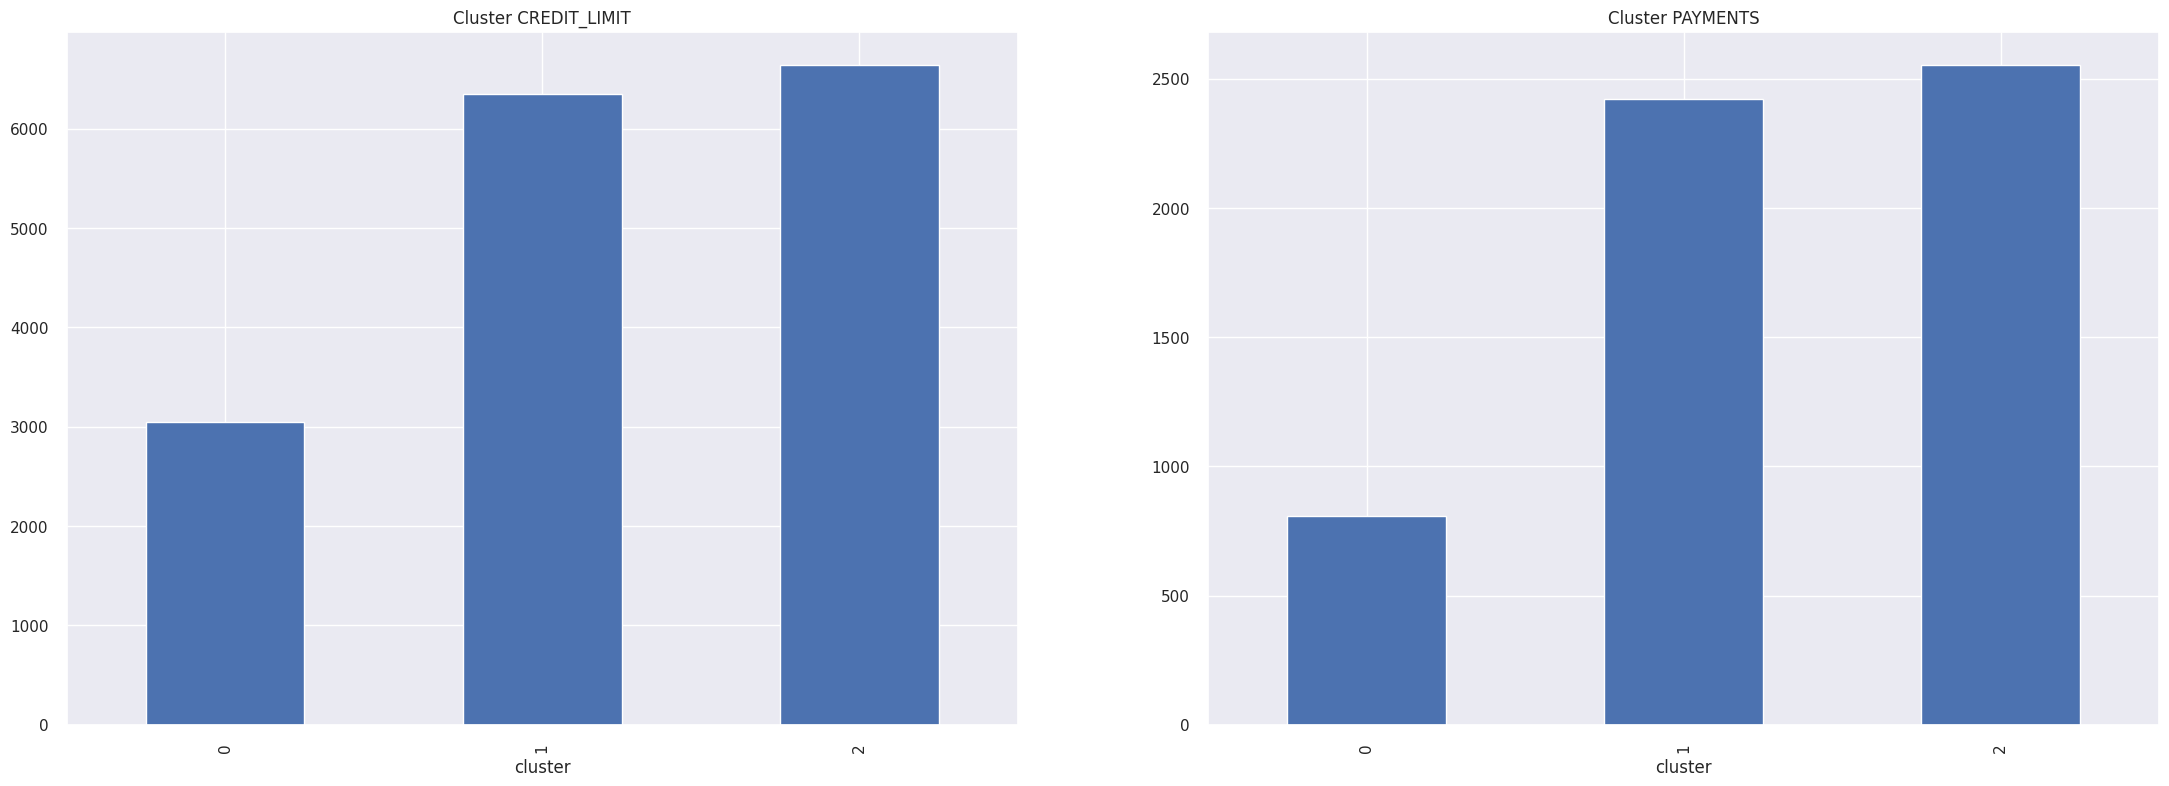

In [147]:
# Melihat bar chart karakteristik cluster berdasarkan nilai credit limit dan payments
plt.figure(figsize=(27,9))

plt.subplot(1,2,1)
cluster_CREDIT_LIMIT.plot(kind='bar')
plt.title('Cluster CREDIT_LIMIT')

plt.subplot(1,2,2)
cluster_PAYMENTS.plot(kind='bar')
plt.title('Cluster PAYMENTS')
plt.show

**Insight:**
- Berdasarkan credit limit (Nilai dalam bentuk USD), cluster 1 dan 2  memiliki selisih yang sedikit, cluster paling tinggi ada pada cluster 2 sebesar 2554.34, cluster 1 sebesar 2422.83, berbeda jauh nilai nya apabila dibandingkan dengan cluster 0 yang hanya sebesar 898.4.
- Berdasarkan payments (Nilai dalam bentuk USD), cluster 1 dan 2 memiliki selisih yang sedikit, cluster paling tinggi ada pada cluster 2 sebesar 6644.3., cluster 1 sebesar 6353.47, berbeda jauh nilai nya apabila dibandingkan dengan cluster 0 yang hanya sebesar 3043.1.

In [148]:

cluster_BALANCE = data.groupby('cluster')['BALANCE'].mean()
cluster_BALANCE

cluster
0     773.766027
1    3857.492195
2    1582.829013
Name: BALANCE, dtype: float64

Text(0.5, 1.0, 'Cluster Berdasarkan BALANCE')

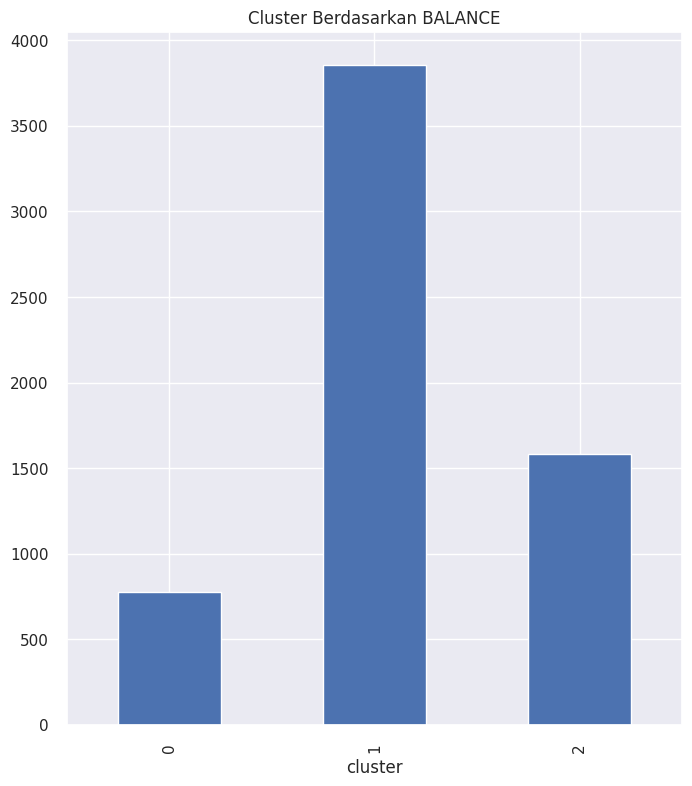

In [149]:

plt.figure(figsize=(27,9))
plt.subplot(1,3,1)
data.groupby('cluster')['BALANCE'].mean().plot(kind='bar')
plt.title('Cluster Berdasarkan BALANCE')

**Insight:**
- Jika berdasarkan nilai rata-rata balance (nilai dalam bentuk USD), cluster 1 memiliki nilai tertinggi yaitu sebesar 3857.49, selanjutnya kedua ada cluster 2 yaitu sebesar 1582.82, sedangkan cluster 0 sebesar 773.7.

In [150]:
# Table mean of columns for each cluster
pd.pivot_table(data, index='cluster', aggfunc=np.mean).T

cluster,0,1,2
BALANCE,773.766027,3857.492195,1582.829013
BALANCE_FREQUENCY,0.850607,0.961889,0.968993
CASH_ADVANCE,317.572906,3355.924352,341.767391
CASH_ADVANCE_FREQUENCY,0.075477,0.425468,0.057537
CASH_ADVANCE_TRX,1.323360,11.399727,1.180328
CREDIT_LIMIT,3043.120232,6353.478854,6644.302419
CUST_ID,4530.602992,4374.002729,4415.271122
INSTALLMENTS_PURCHASES,199.677468,134.815143,1073.347465
MINIMUM_PAYMENTS,395.948144,1378.776705,673.817953
ONEOFF_PURCHASES,196.416045,199.474638,1557.683695


**Karakteristik Cluster:**

0. General User :

- Anggotanya paling banyak diantara kedua cluster lainnya (63.1%).
- Memiliki rata-rata credit limit paling rendah (sekitar 3.000 USD).
- Memiliki rata-rata nominal pinjaman yang rendah (sekitar 800 USD), terlihat jarang menggunakan kartu kredit, sehingga diperkirakan merupakan pengguna yang alat transaksi utamanya bukan kartu kredit.
- Termasuk low value customer karena meskipun jumlahnya banyak tetapi memiliki perputaran uang yang paling sedikit.

1. High Cash Advance :

- Jumlahnya paling sedikit diantara kedua cluster lainnya (17.7%).
- Memiliki rata-rata credit limit sekitar 6.000 USD.
- Memiliki rata-rata nominal tarik tunai paling besar, dan paling sering melakukan tarik tunai. Namun jarang melakukan purchases.
- Memiliki rata-rata pinjaman yang lebih tinggi daripada payments-nya, dan rata-rata minimum payments-nya juga tertinggi. Artinya cluster ini memiliki lebih banyak pinjaman dibandingkan kemampuan melunasinya.

2. High Purchase :

- Jumlahnya 19.2% dari total keseluruhan customer.
- Memiliki rata-rata credit limit sekitar 6.500 USD.
- Paling sering melakukan purchases dan jarang melakukan tarik tunai.
- Pelanggan pada cluster ini menyukai bertransaksi dengan 1 kali bayar maupun dengan cicilan, terlihat dari rata-rata frekuensi one off purchases (0.56) dan frekuensi installment purchases (0.71) yang tinggi.
- Memiliki rata-rata payments tertinggi dan lebih besar dari balance/saldo kredit-nya, artinya cluster ini disiplin membayar tagihan kredit. Sehingga cluster ini dapat dikatakan sebagai high value customer.
    
    
    
    
    
    
   


# 10. Model Saving

In [151]:
 with open('model_km.pkl', 'wb') as file_1:
  joblib.dump(model_km, file_1)

 with open('model_pca.pkl', 'wb') as file_2:
  joblib.dump(pca, file_2)

 with open('model_scaler.pkl', 'wb') as file_3:
  joblib.dump(scaler, file_3)

# 11. Model Inference

In [152]:
 # Loading data
 with open('model_km.pkl', 'rb') as file_1:
  model_km= joblib.load(file_1)

 with open('model_pca.pkl', 'rb') as file_2:
  pca= joblib.load(file_2)

 with open('model_scaler.pkl', 'rb') as file_3:
  scaler= joblib.load(file_3)

In [153]:
# Membuat data baru
data_inf = pd.DataFrame ({
              'CUST_ID' : [4266, 8614, 3564,3976],
              'BALANCE' : [943.584041, 2237.238086, 809.582978, 1977.007090],
              'BALANCE_FREQUENCY' : [1.000000, 0.375000, 0.909091, 1.000000],
              'PURCHASES' : [585.00, 1450.00, 1200.00, 0.00],
              'ONEOFF_PURCHASES' : [585.00, 1450.00, 120.00, 0.00],
              'INSTALLMENTS_PURCHASES' : [133.76, 805.14, 133.76, 0.00],
              'CASH_ADVANCE' : [0.00, 0.00, 2008.153534, 4359.325750],
              'PURCHASES_FREQUENCY' : [0.125000, 1.000000, 0.909091, 0.454545],
              'ONEOFF_PURCHASES_FREQUENCY' : [0.125000,0.000000, 0.727273, 0.090909],
              'PURCHASES_INSTALLMENTS_FREQUENCY' : [0.363636, 0.818182, 0.000000, 0.000000],
              'CASH_ADVANCE_FREQUENCY' : [0.545455, 0.545455, 0.545455, 0.545455],
              'CASH_ADVANCE_TRX' : [9, 17, 21, 7],
              'PURCHASES_TRX' : [1, 20, 25, 17],
              'CREDIT_LIMIT' : [1000.0, 2500.0, 10100.0, 4150.0],
              'PAYMENTS' : [397.090516, 343.102984, 4372.148648, 905.844846],
              'MINIMUM_PAYMENTS' : [227.143184, 712.986387, 886.050237, 241.645387],
              'PRC_FULL_PAYMENT' : [0.000000, 0.000000, 0.000000, 0.000000],
              'TENURE' : [8, 11, 12, 8]
})

In [154]:
# Copy data untuk arsip
data_enc=data.copy()

In [155]:
# Menampilkan data baru
data_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4266,943.584041,1.000000,585.0,585.0,133.76,0.000000,0.125000,0.125000,0.363636,0.545455,9,1,1000.0,397.090516,227.143184,0.0,8
1,8614,2237.238086,0.375000,1450.0,1450.0,805.14,0.000000,1.000000,0.000000,0.818182,0.545455,17,20,2500.0,343.102984,712.986387,0.0,11
2,3564,809.582978,0.909091,1200.0,120.0,133.76,2008.153534,0.909091,0.727273,0.000000,0.545455,21,25,10100.0,4372.148648,886.050237,0.0,12
3,3976,1977.007090,1.000000,0.0,0.0,0.00,4359.325750,0.454545,0.090909,0.000000,0.545455,7,17,4150.0,905.844846,241.645387,0.0,8


In [156]:
# Melakukan drop kolom CUST_ID pada data baru
selected_data = data_inf.drop('CUST_ID', axis=1, inplace=True)
selected_data

In [157]:
# melakukan scaling pada data baru
data_inf_scaled = scaler.transform(data_inf)

In [158]:
# Melakukan pca pada data baru
data_inf_scaled_pca = pca.transform(data_inf_scaled)


In [159]:
# membuat prediksi cluster pada data baru
data_inf['cluster'] = model_km.predict(data_inf_scaled_pca)

In [160]:
# Hasil Predict
data_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,943.584041,1.000000,585.0,585.0,133.76,0.000000,0.125000,0.125000,0.363636,0.545455,9,1,1000.0,397.090516,227.143184,0.0,8,0
1,2237.238086,0.375000,1450.0,1450.0,805.14,0.000000,1.000000,0.000000,0.818182,0.545455,17,20,2500.0,343.102984,712.986387,0.0,11,0
2,809.582978,0.909091,1200.0,120.0,133.76,2008.153534,0.909091,0.727273,0.000000,0.545455,21,25,10100.0,4372.148648,886.050237,0.0,12,1
3,1977.007090,1.000000,0.0,0.0,0.00,4359.325750,0.454545,0.090909,0.000000,0.545455,7,17,4150.0,905.844846,241.645387,0.0,8,1


#12. Pengambilan Kesimpulan

Hasil Evaluasi elbow method ada line membentuk siku pada nilai 3, sehingga bisa dikatakan bahwa K yang terbaik adalah K = 3, sedangkan dari hasil silhoute score K=3 merupakan cluster yang paling optimal dikarenakan paling kecil nilai minus nya dibanding lainnya dan setiap clusternya memiliki nilai yang lebih dari mean keseluruhan.

Salah satu kelebihan dari K-Means adalah kesederhanaannya yang membuatnya mudah digunakan dan efisien dalam menemukan Cluster dengan bentuk elips atau bola. Namun, K-Means juga memiliki kelemahan yaitu tidak efektif dalam menangani Cluster dengan ukuran atau bentuk yang tidak terdefinisi dengan jelas.

Improvement selanjutnya bisa menambah jumlah data dan menambah kolom yang diperlukan untuk secara detail memahami karakteristik customer, sedangkan dari segi preprocessingnya bisa mencoba dimensional reduction dengan metode t-SNE karena t-SNE mampu menangkap banyak struktur lokal dari data berdimensi tinggi dengan sangat baik, sekaligus menunjukkan struktur global seperti keberadaan cluster di beberapa skala yang kemungkinan hasilnya lebih baik.


**Karakteristik Cluster dari hasil EDA:**

0. General User :

- Anggotanya paling banyak diantara kedua cluster lainnya (63.1%).
- Memiliki rata-rata credit limit paling rendah (sekitar 3.000 USD).
- Memiliki rata-rata nominal pinjaman yang rendah (sekitar 800 USD), terlihat jarang menggunakan kartu kredit, sehingga diperkirakan merupakan pengguna yang alat transaksi utamanya bukan kartu kredit.
- Termasuk low value customer karena meskipun jumlahnya banyak tetapi memiliki perputaran uang yang paling sedikit.

1. High Cash Advance :

- Jumlahnya paling sedikit diantara kedua cluster lainnya (17.7%).
- Memiliki rata-rata credit limit sekitar 6.000 USD.
- Memiliki rata-rata nominal tarik tunai paling besar, dan paling sering melakukan tarik tunai. Namun jarang melakukan purchases.
- Memiliki rata-rata pinjaman yang lebih tinggi daripada payments-nya, dan rata-rata minimum payments-nya juga tertinggi. Artinya cluster ini memiliki lebih banyak pinjaman dibandingkan kemampuan melunasinya.

2. High Purchase :

- Jumlahnya 19.2% dari total keseluruhan customer.
- Memiliki rata-rata credit limit sekitar 6.500 USD.
- Paling sering melakukan purchases dan jarang melakukan tarik tunai.
- Pelanggan pada cluster ini menyukai bertransaksi dengan 1 kali bayar maupun dengan cicilan, terlihat dari rata-rata frekuensi one off purchases (0.56) dan frekuensi installment purchases (0.71) yang tinggi.
- Memiliki rata-rata payments tertinggi dan lebih besar dari balance/saldo kredit-nya, artinya cluster ini disiplin membayar tagihan kredit. Sehingga cluster ini dapat dikatakan sebagai high value customer.

**Rekomendasi untuk Perusahaan** jika perusahaan ingin membuat user semakin tertarik bertransaksi menggunakan credit card (retain), maka bisa memberikan reward sesuai level atau bisa juga membuat program promo membership agar beberapa customer tertarik untuk naik level dari yang sebelumnya.